# MAP654I: Practical Introduction to Machine Learning  
## Practical Session 1: Unsupervised Learning
## <span style="color:orange;">*Temperature dataset* 🔥

#### Importing libraries

In [58]:
import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, rand_score
from sklearn.mixture import GaussianMixture
import seaborn as sns

#### Loading data

In [6]:
x1 = np.load("temper.npz") #load the data

#### Data exploration

In [7]:
x1.files 

['villes', 'data', 'varname']

In [48]:
# Load the data matrix, cities, and variable names from the dataset
data_matrix = x1['data']      # Contains the main data
villes = x1['villes']         # List of cities
varname = x1['varname']       # Names of the variables/columns

# Extract the temperature matrix (first 12 columns)
temperature_matrix = data_matrix[:, :12]

# Display the extracted temperature matrix
print("Matrice des températures (15x12) :")
print(temperature_matrix)

# Display the list of cities
print("\nListe des villes :")
print(villes)

# Display the names of the variables/columns
print("\nNoms des variables/colonnes :")
print(varname)

Matrice des températures (15x12) :
[[ 5.6  6.6 10.3 12.8 15.8 19.3 20.9 21.  18.6 13.8  9.1  6.2]
 [ 6.1  5.8  7.8  9.2 11.6 14.4 15.6 16.  14.7 12.   9.   7. ]
 [ 2.6  3.7  7.5 10.3 13.8 17.3 19.4 19.1 16.2 11.2  6.6  3.6]
 [ 1.5  3.2  7.7 10.6 14.5 17.8 20.1 19.5 16.7 11.4  6.5  2.3]
 [ 2.4  2.9  6.   8.9 12.4 15.3 17.1 17.1 14.7 10.4  6.1  3.5]
 [ 2.1  3.3  7.7 10.9 14.9 18.5 20.7 20.1 16.9 11.4  6.7  3.1]
 [ 5.5  6.6 10.  13.  16.8 20.8 23.3 22.8 19.9 15.  10.2  6.9]
 [ 5.6  6.7  9.9 12.8 16.2 20.1 22.7 22.3 19.3 14.6 10.   6.5]
 [ 5.   5.3  8.4 10.8 13.9 17.2 18.8 18.6 16.4 12.2  8.2  5.5]
 [ 7.5  8.5 10.8 13.3 16.7 20.1 22.7 22.5 20.3 16.  11.5  8.2]
 [ 3.4  4.1  7.6 10.7 14.3 17.5 19.1 18.7 16.  11.4  7.1  4.3]
 [ 4.8  5.3  7.9 10.1 13.1 16.2 17.9 17.8 15.7 11.6  7.8  5.4]
 [ 0.4  1.5  5.6  9.8 14.  17.2 19.  18.3 15.1  9.5  4.9  1.3]
 [ 4.7  5.6  9.2 11.6 14.9 18.7 20.9 20.9 18.3 13.3  8.6  5.5]
 [ 2.4  3.4  7.1  9.9 13.6 17.1 19.3 18.8 16.  11.   6.6  3.4]]

Liste des villes :

#### Monthly Average Temperature Calculation and Visualization

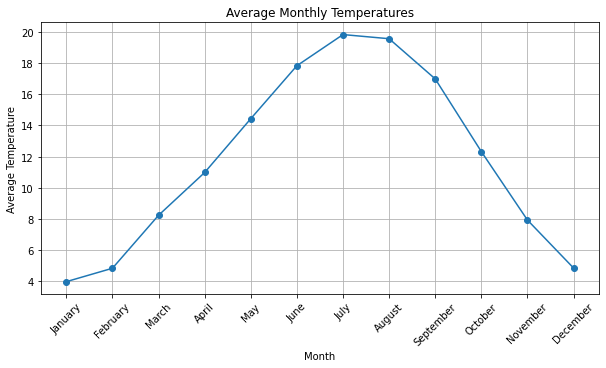

In [9]:
# Calculate the averages for each month
mean_temperatures = np.mean(temperature_matrix, axis=0)

# Visualize the averages with plt.plot
plt.figure(figsize=(10, 5))
plt.plot(mean_temperatures, marker='o')
plt.title('Average Monthly Temperatures')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.xticks(ticks=np.arange(12), labels=x1['varname'][:12], rotation=45)
plt.grid(True)
plt.show()

This code snippet calculates and visualizes the average monthly temperatures using data from the `temperature_matrix`. The plot shows that higher temperatures are observed in the summer months (June, July, and August) and lower temperatures in the winter months (December, January, and February). 

#### Temperature Curves Plotting for Each City

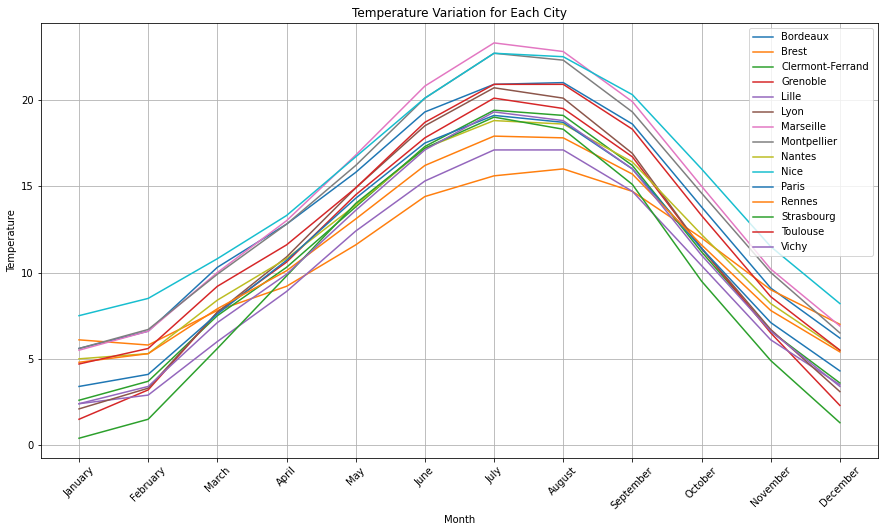

In [10]:
# Plot the temperature curves for each city
plt.figure(figsize=(15, 8))
for i in range(temperature_matrix.shape[0]):
    plt.plot(temperature_matrix[i], label=villes[i])

plt.title("Temperature Variation for Each City")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.xticks(ticks=np.arange(12), labels=x1['varname'][:12], rotation=45)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

The graph displays the monthly temperature variations for different cities in France over the course of a year. Most cities show a similar trend, with temperatures increasing from January to July, peaking in the summer months, and then gradually decreasing towards December.

Overall, this graph provides a clear visual comparison of the temperature trends for different cities, highlighting both common patterns and unique characteristics of each location throughout the year.

#### Extracting and Plotting City Positions

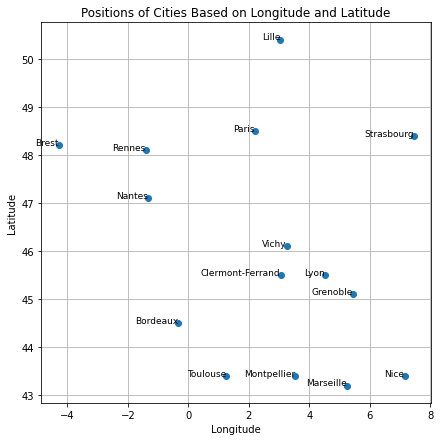

In [52]:
# Extract the latitude and longitude columns
latitude = x1['data'][:, 12]
longitude = x1['data'][:, 13]

# Extract the list of cities
cities = x1['villes']

# Plot the positions of the cities
plt.figure(figsize=(7, 7))
plt.scatter(longitude, latitude, marker='o')

# Annotate each point with the city name
for i, city in enumerate(cities):
    plt.text(longitude[i], latitude[i], city, fontsize=9, ha='right')

plt.title("Positions of Cities Based on Longitude and Latitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

### K-means clustering 

##### Elbow method for determining the optimum number of clusters

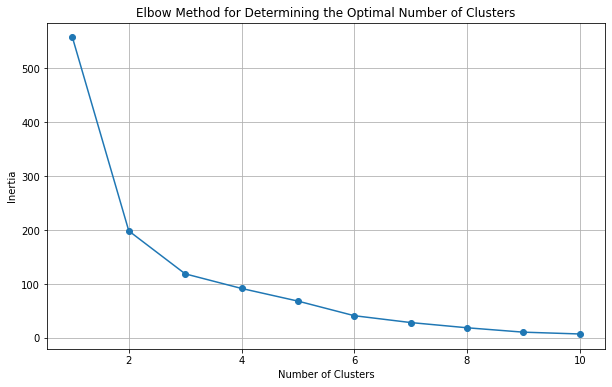

In [12]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(temperature_matrix)
    inertias.append(kmeans.inertia_)

# Plot the inertia curve as a function of the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method for Determining the Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

We observe that the elbow occurs at \( k = 2 \), where the inertia value begins to decline at a slower pace. However, at \( k = 3 \), the inertia value continues to decrease at a notable rate. Consequently, both \( k = 2 \) and \( k = 3 \) can be considered for analysis and comparison of the results.

#### Training the K-means model

##### *k_optimal = 2*

Here, we will train the K-means model with \( k = 2 \) and visualize the clusters. The algorithm is trained based on the temperature data for each city.

In [13]:
# Choose the number of clusters
k_optimal = 2

# Apply the KMeans algorithm
kmeans = KMeans(n_clusters=k_optimal, random_state=42) # random_state=42 for reproducibility
clusters = kmeans.fit_predict(temperature_matrix)

#### Cluster display by longitude and latitude

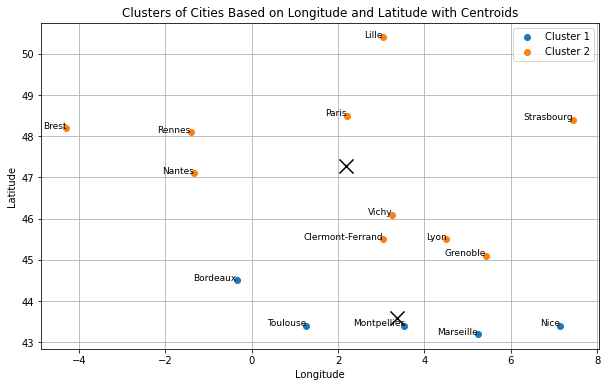

In [14]:
# Calculate the centroids using the average latitudes and longitudes of the clusters
centroids = np.zeros((k_optimal, 2))
for cluster in range(k_optimal):
    centroids[cluster, 0] = np.mean(longitude[clusters == cluster])
    centroids[cluster, 1] = np.mean(latitude[clusters == cluster])

# Visualize the clusters based on longitude and latitude
plt.figure(figsize=(10, 6))
for cluster in range(k_optimal):
    plt.scatter(longitude[clusters == cluster], latitude[clusters == cluster], label=f'Cluster {cluster + 1}', cmap='tab10', vmax=9)
    plt.scatter(centroids[cluster, 0], centroids[cluster, 1], marker='x', s=200, c='black')  # Display the centroids

# Annotate each point with the city name
for i, city in enumerate(cities):
    plt.text(longitude[i], latitude[i], city, fontsize=9, ha='right')

plt.title("Clusters of Cities Based on Longitude and Latitude with Centroids")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()


##### Display the average temperature curve for each cluster 

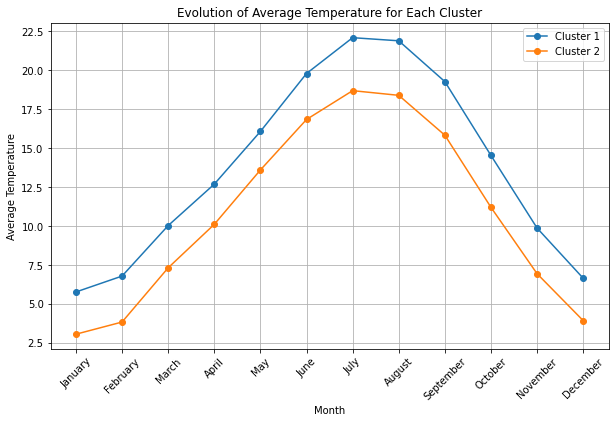

In [15]:
# Calculate the average temperature for each cluster
average_temperatures_per_cluster = np.zeros((k_optimal, temperature_matrix.shape[1]))

for cluster in range(k_optimal):
    average_temperatures_per_cluster[cluster] = np.mean(temperature_matrix[clusters == cluster], axis=0)

# Plot the average temperature evolution for each cluster
plt.figure(figsize=(10, 6))
for cluster in range(k_optimal):
    plt.plot(average_temperatures_per_cluster[cluster], marker='o', label=f'Cluster {cluster + 1}')

plt.title("Evolution of Average Temperature for Each Cluster")
plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.xticks(ticks=np.arange(12), labels=varname[:12], rotation=45)
plt.legend()
plt.grid(True)
plt.show()

We can observe that the two clusters exhibit distinct temperature patterns throughout the year. Cluster 1 represents cities with higher average temperatures, while Cluster 2 includes cities with lower average temperatures. The temperature curves for each cluster provide a clear visual representation of the differences in temperature trends between the two groups of cities.

##### *k_optimal = 3*

Here, we will train the K-means model with \( k = 3 \) and visualize the clusters. The algorithm is trained based on the temperature data for each city.

In [16]:
# Choix du nombre de clusters
k_optimal = 3

# Appliquer l'algorithme KMeans
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(temperature_matrix)

##### Cluster display by longitude and latitude

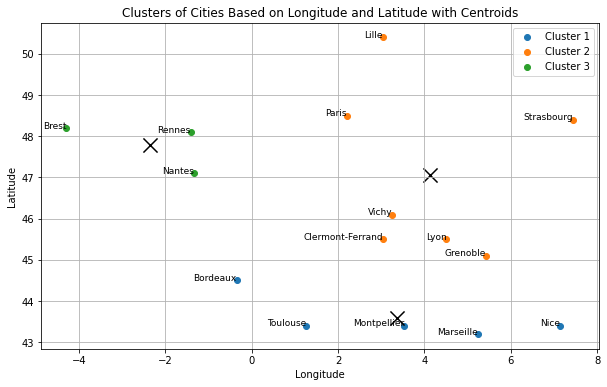

In [17]:
# Calculate the centroids using the average latitudes and longitudes of the clusters
centroids = np.zeros((k_optimal, 2))
for cluster in range(k_optimal):
    centroids[cluster, 0] = np.mean(longitude[clusters == cluster])
    centroids[cluster, 1] = np.mean(latitude[clusters == cluster])

# Visualize the clusters based on longitude and latitude
plt.figure(figsize=(10, 6))
for cluster in range(k_optimal):
    plt.scatter(longitude[clusters == cluster], latitude[clusters == cluster], label=f'Cluster {cluster + 1}', cmap='tab10', vmax=9)
    plt.scatter(centroids[cluster, 0], centroids[cluster, 1], marker='x', s=200, c='black')  # Display the centroids

# Annotate each point with the city name
for i, city in enumerate(cities):
    plt.text(longitude[i], latitude[i], city, fontsize=9, ha='right')

plt.title("Clusters of Cities Based on Longitude and Latitude with Centroids")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()

While training the K-means on the temperature data for each city, we observe that the samples are clustered by their geographical positions. So, the clustering recover a geographical similarity between the cities because each region has a specific temperature range and climate patterns are largely influenced by geographic location. For example, cities within the same region or with similar geographical characteristics (such as proximity to the coast, altitude, or latitude) tend to experience comparable temperature variations throughout the year.

##### Display the average temperature curve for each cluster 

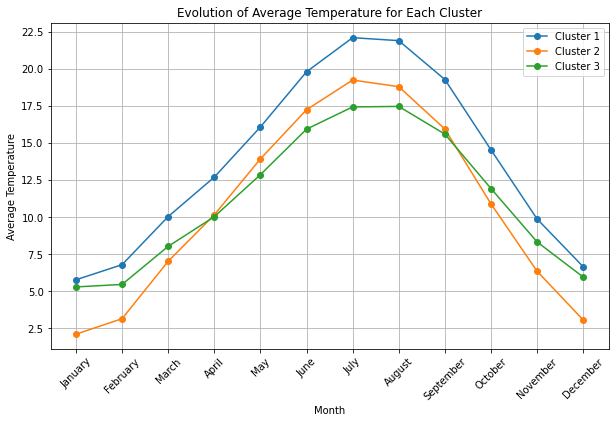

In [18]:
# Calculate the average temperature for each cluster
average_temperatures_per_cluster = np.zeros((k_optimal, temperature_matrix.shape[1]))

for cluster in range(k_optimal):
    average_temperatures_per_cluster[cluster] = np.mean(temperature_matrix[clusters == cluster], axis=0)

# Plot the average temperature evolution for each cluster
plt.figure(figsize=(10, 6))
for cluster in range(k_optimal):
    plt.plot(average_temperatures_per_cluster[cluster], marker='o', label=f'Cluster {cluster + 1}')

plt.title("Evolution of Average Temperature for Each Cluster")
plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.xticks(ticks=np.arange(12), labels=varname[:12], rotation=45)
plt.legend()
plt.grid(True)
plt.show()

**Cluster 1** stands out as having the highest temperatures consistently throughout the year. When comparing **Cluster 2** and **Cluster 3**, distinct differences in temperature patterns emerge. During the summer, **Cluster 2** experiences higher temperatures than **Cluster 3**, with a more pronounced peak, indicating that cities in Cluster 2 generally have warmer summers. However, in the winter, **Cluster 2** has colder temperatures, with the curve dipping below that of **Cluster 3**, suggesting colder winters. This implies that cities in **Cluster 2** experience more extreme seasonal variations, with hot summers and cold winters. In contrast, **Cluster 3** maintains a more moderate temperature profile, with cooler summers and milder winters, showing less seasonal fluctuation overall.

---

### Density Estimation

#### K = 2

In [43]:
# Set up and fit the GMM
gmm = GaussianMixture(n_components=2, covariance_type='diag', random_state=42)
gmm.fit(temperature_matrix)

# Predict the labels (clusters) for each city
labels = gmm.predict(temperature_matrix)

# Get the GMM parameters
weights = gmm.weights_
means = gmm.means_
covariances = gmm.covariances_
std_devs = np.sqrt(covariances)  

# Output the results
print("Villes:", villes)
print("Cluster labels:", labels)
print("Weights:", weights)
print("Means:", means)
print("Covariances:", covariances)

Villes: ['Bordeaux' 'Brest' 'Clermont-Ferrand' 'Grenoble' 'Lille' 'Lyon'
 'Marseille' 'Montpellier' 'Nantes' 'Nice' 'Paris' 'Rennes' 'Strasbourg'
 'Toulouse' 'Vichy']
Cluster labels: [0 1 1 1 1 1 0 0 1 0 1 1 1 0 1]
Weights: [0.33333329 0.66666671]
Means: [[ 5.78000015  6.80000017 10.04000012 12.70000016 16.08000017 19.80000016
  22.10000017 21.90000014 19.28000014 14.54000018  9.88000018  6.66000016]
 [ 3.07000012  3.85000012  7.33000013 10.1200001  13.61000009 16.85000013
  18.70000016 18.40000018 15.84000017 11.21000015  6.95000012  3.94000011]]
Covariances: [[0.85360096 0.88400092 0.27440094 0.33600088 0.47760087 0.5280009
  1.00800094 0.62800095 0.56960094 0.88640091 0.99760091 0.80240092]
 [2.76610099 1.54450111 0.6881012  0.41560113 0.89690105 1.33850115
  1.9880012  1.27000135 0.55240139 0.54890127 1.19450111 2.502401  ]]


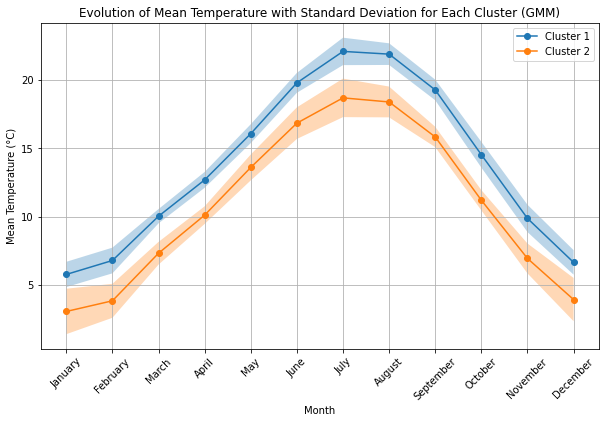

In [46]:
# Plot the evolution of the mean temperature with standard deviation
plt.figure(figsize=(10, 6))

# For each cluster, plot the mean and fill the standard deviation band
for i in range(gmm.n_components):
    plt.plot(means[i], label=f'Cluster {i + 1}', marker='o')

    # Fill the area between mean ± std_dev
    plt.fill_between(np.arange(12), 
                     means[i] - std_devs[i], 
                     means[i] + std_devs[i], 
                     alpha=0.3)

plt.title("Evolution of Mean Temperature with Standard Deviation for Each Cluster (GMM)")
plt.xlabel("Month")
plt.ylabel("Mean Temperature (°C)")
plt.xticks(ticks=np.arange(12), labels=varname[:12], rotation=45)
plt.legend()
plt.grid(True)
plt.show()

The plot shows the **mean temperature** evolution over the months for two distinct clusters identified by the Gaussian Mixture Model (GMM). Each cluster has associated error bands representing the **standard deviation** (the shaded regions around each line), indicating the variability in temperatures within that cluster.

1. **Cluster 1 (Blue)**: 
   - This cluster represents cities that experience **higher mean temperatures** throughout the year.
   - The peak temperature is observed around the summer months (June to August), showing a noticeable increase in temperature during this period.
   - The error bands (standard deviation) indicate that there is some variability in temperatures within this cluster, but the variability is relatively moderate.
   
2. **Cluster 2 (Orange)**:
   - This cluster represents cities that experience **lower mean temperatures** throughout the year.
   - Similar to Cluster 1, the peak is also observed in the summer months, but the mean temperatures are consistently lower than those of Cluster 1.
   - The error bands in this cluster suggest slightly less variability compared to Cluster 1, but it still shows some spread in temperatures.
  
The shaded regions for both clusters show that while there are variations in temperature, each cluster maintains a consistent separation between the warmer (Cluster 1) and cooler (Cluster 2) cities across the year.

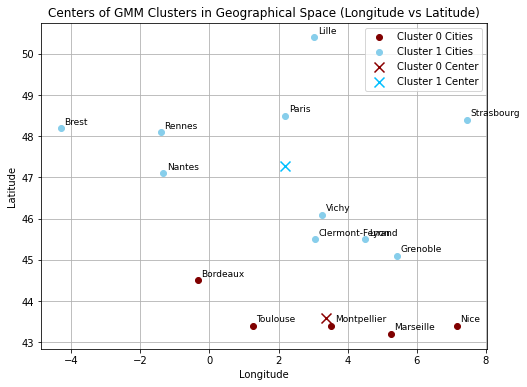

In [75]:
# Calculate the geographical centers (latitude and longitude) for each cluster
cluster_0_center = [latitude[labels == 0].mean(), longitude[labels == 0].mean()]
cluster_1_center = [latitude[labels == 1].mean(), longitude[labels == 1].mean()]

# Plot the geographical position of the cities with the cluster centers
plt.figure(figsize=(8, 6))

# Scatter plot for cities in Cluster 0 (e.g., red)
plt.scatter(longitude[labels == 0], latitude[labels == 0], color='maroon', marker='o', label='Cluster 0 Cities')

# Scatter plot for cities in Cluster 1 (e.g., blue)
plt.scatter(longitude[labels == 1], latitude[labels == 1], color='skyblue', marker='o', label='Cluster 1 Cities')

# Plot the cluster centers
plt.scatter(cluster_0_center[1], cluster_0_center[0], color='darkred', label='Cluster 0 Center', marker='x', s=100)
plt.scatter(cluster_1_center[1], cluster_1_center[0], color='deepskyblue', label='Cluster 1 Center', marker='x', s=100)

# Annotate the cities with their names
for i, ville in enumerate(villes):
    plt.text(longitude[i] + 0.1, latitude[i] + 0.1, ville, fontsize=9)

# Add plot titles and labels
plt.title('Centers of GMM Clusters in Geographical Space (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

The centers of the Gaussian distributions in the mixture model represent the mean temperatures for each cluster. This analysis helps to identify distinct temperature patterns and trends for different groups of cities based on their geographical locations and climate characteristics.

#### K = 3

In [76]:
# Set up and fit the GMM
gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=42)
gmm.fit(temperature_matrix)

# Predict the labels (clusters) for each city
labels = gmm.predict(temperature_matrix)

# Get the GMM parameters
weights = gmm.weights_
means = gmm.means_
covariances = gmm.covariances_
std_devs = np.sqrt(covariances)

# Output the results
print("Villes:", villes)
print("Cluster labels:", labels)
print("Weights:", weights)
print("Means:", means)
print("Covariances:", covariances)

Villes: ['Bordeaux' 'Brest' 'Clermont-Ferrand' 'Grenoble' 'Lille' 'Lyon'
 'Marseille' 'Montpellier' 'Nantes' 'Nice' 'Paris' 'Rennes' 'Strasbourg'
 'Toulouse' 'Vichy']
Cluster labels: [0 2 1 1 1 1 0 0 2 0 1 2 1 0 1]
Weights: [0.33333333 0.46666667 0.2       ]
Means: [[ 5.78        6.8        10.04       12.7        16.08       19.8
  22.1        21.9        19.28       14.54        9.88        6.66      ]
 [ 2.11428573  3.15714287  7.02857143 10.15714286 13.92857143 17.24285714
  19.24285714 18.8        15.94285714 10.90000001  6.35714287  3.07142858]
 [ 5.3         5.46666667  8.03333333 10.03333333 12.86666666 15.93333332
  17.43333332 17.46666666 15.59999999 11.93333333  8.33333334  5.96666667]]
Covariances: [[0.853601   0.884001   0.274401   0.336001   0.477601   0.528001
  1.008001   0.628001   0.569601   0.886401   0.997601   0.802401  ]
 [0.76693981 0.58245    0.65061325 0.40530712 0.55347039 0.82244998
  1.07959284 0.77428671 0.54530712 0.43714386 0.42816428 0.83061327]
 [0.3266

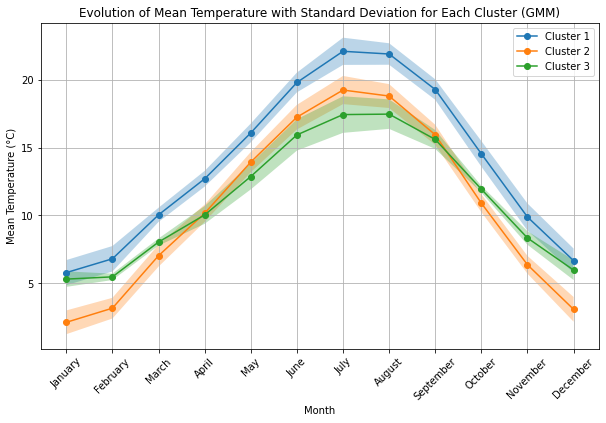

In [77]:
# Plot the evolution of the mean temperature with standard deviation
plt.figure(figsize=(10, 6))

# For each cluster, plot the mean and fill the standard deviation band
for i in range(gmm.n_components):
    plt.plot(means[i], label=f'Cluster {i + 1}', marker='o')

    # Fill the area between mean ± std_dev
    plt.fill_between(np.arange(12), 
                     means[i] - std_devs[i], 
                     means[i] + std_devs[i], 
                     alpha=0.3)

plt.title("Evolution of Mean Temperature with Standard Deviation for Each Cluster (GMM)")
plt.xlabel("Month")
plt.ylabel("Mean Temperature (°C)")
plt.xticks(ticks=np.arange(12), labels=varname[:12], rotation=45)
plt.legend()
plt.grid(True)
plt.show()    

   - **Cluster 1 (High Temperature)**: This cluster represents areas where temperatures are significantly higher, particularly in summer. The data shows a consistently high average temperature, with a relatively low standard deviation, indicating a certain stability of temperatures in this region.
   - **Cluster 2**: In summer, the temperatures are higher than those of Cluster 3, while in winter, the temperatures are lower than those of Cluster 3.
   - **Cluster 3**: In summer, this cluster exhibits lower temperatures compared to Cluster 2, indicating a cooler climate. In winter, the trend reverses, with higher temperatures compared to Cluster 2.

**Variability and Standard Deviation:**
   - **Winter**: During winter, the two clusters (Cluster 2 and Cluster 3) show a clear separation in terms of temperature, indicating that the areas corresponding to each cluster have distinct winter conditions. This suggests that climatic factors (such as altitude or proximity to the ocean) strongly influence these clusters, making their distinction more pronounced.
   - **Summer**: In summer, the variability of temperatures in the two clusters (Cluster 2 and Cluster 3) shows some overlap, with higher standard deviations. This may indicate greater climatic variability or local influences affecting the temperature, making the clusters less distinct compared to winter.

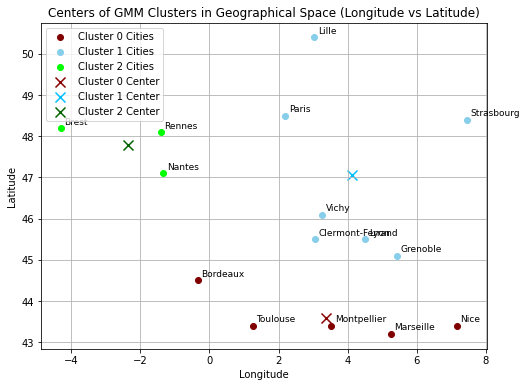

In [78]:
# Calculate the geographical centers (latitude and longitude) for each cluster
cluster_0_center = [latitude[labels == 0].mean(), longitude[labels == 0].mean()]
cluster_1_center = [latitude[labels == 1].mean(), longitude[labels == 1].mean()]
cluster_2_center = [latitude[labels == 2].mean(), longitude[labels == 2].mean()]

# Plot the geographical position of the cities with the cluster centers
plt.figure(figsize=(8, 6))

# Scatter plot for cities in Cluster 0 (e.g., red)
plt.scatter(longitude[labels == 0], latitude[labels == 0], color='maroon', marker='o', label='Cluster 0 Cities')

# Scatter plot for cities in Cluster 1 (e.g., blue)
plt.scatter(longitude[labels == 1], latitude[labels == 1], color='skyblue', marker='o', label='Cluster 1 Cities')

# Scatter plot for cities in Cluster 2 (e.g., green)
plt.scatter(longitude[labels == 2], latitude[labels == 2], color='lime', marker='o', label='Cluster 2 Cities')

# Plot the cluster centers
plt.scatter(cluster_0_center[1], cluster_0_center[0], color='darkred', label='Cluster 0 Center', marker='x', s=100)
plt.scatter(cluster_1_center[1], cluster_1_center[0], color='deepskyblue', label='Cluster 1 Center', marker='x', s=100)
plt.scatter(cluster_2_center[1], cluster_2_center[0], color='darkgreen', label='Cluster 2 Center', marker='x', s=100)

# Annotate the cities with their names
for i, ville in enumerate(villes):
    plt.text(longitude[i] + 0.1, latitude[i] + 0.1, ville, fontsize=9)

# Add plot titles and labels
plt.title('Centers of GMM Clusters in Geographical Space (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

For k=3, The clusters are more clearly separated compared to k=2, where each cluster represents a distinct temperature profile based on the geographical characteristics of the cities. 

C:\Users\moham\AppData\Local\Temp\ipykernel_18760\2516973678.py:12: RuntimeWarning: invalid value encountered in sqrt
  std_devs = np.sqrt(covariances)


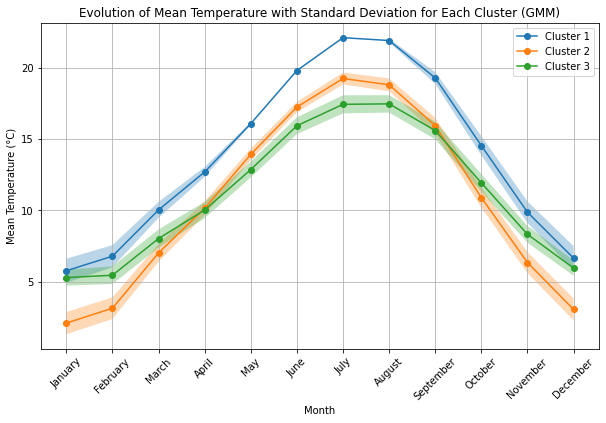

In [88]:
# Change the shape of the covariance
gmm = GaussianMixture(n_components=3, covariance_type='tied', random_state=42)
gmm.fit(temperature_matrix)

# Predict the labels (clusters) for each city
labels = gmm.predict(temperature_matrix)

# Get the GMM parameters
weights = gmm.weights_
means = gmm.means_
covariances = gmm.covariances_
std_devs = np.sqrt(covariances)

# Plot the evolution of the mean temperature with standard deviation
plt.figure(figsize=(10, 6))

# For each cluster, plot the mean and fill the standard deviation band
for i in range(gmm.n_components):
    plt.plot(means[i], label=f'Cluster {i + 1}', marker='o')

    # Fill the area between mean ± std_dev
    plt.fill_between(np.arange(12), 
                     means[i] - std_devs[i], 
                     means[i] + std_devs[i], 
                     alpha=0.3)

plt.title("Evolution of Mean Temperature with Standard Deviation for Each Cluster (GMM)")
plt.xlabel("Month")
plt.ylabel("Mean Temperature (°C)")
plt.xticks(ticks=np.arange(12), labels=varname[:12], rotation=45)
plt.legend()
plt.grid(True)
plt.show()  

In Gaussian Mixture Models (GMM), four types of covariance are available:

1. **Full**: Each component has its own full covariance matrix, allowing each component to have a unique shape, orientation, and size across all dimensions.
2. **Tied**: All components share the same general covariance matrix, which forces all components to have the same shape and orientation, encouraging a more spherical distribution.
3. **Diag**: Each component has its own diagonal covariance matrix, allowing components to have different variances along each dimension, but assuming no correlation between dimensions.
4. **Spherical**: Each component has its own unique variance, assuming that the shape of each component is spherical, with a single variance across all dimensions.

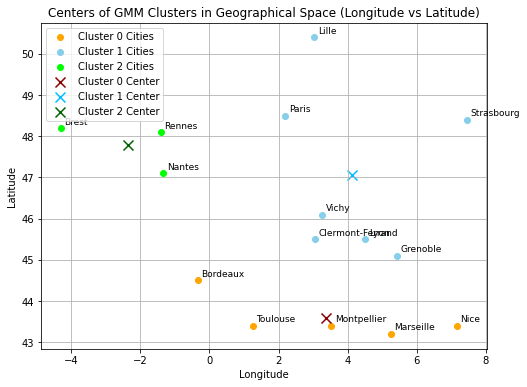

In [98]:
# Calculate the geographical centers (latitude and longitude) for each cluster
cluster_0_center = [latitude[labels == 0].mean(), longitude[labels == 0].mean()]
cluster_1_center = [latitude[labels == 1].mean(), longitude[labels == 1].mean()]
cluster_2_center = [latitude[labels == 2].mean(), longitude[labels == 2].mean()]

# Plot the geographical position of the cities with the cluster centers
plt.figure(figsize=(8, 6))

# Scatter plot for cities in Cluster 0 (e.g., red)
plt.scatter(longitude[labels == 0], latitude[labels == 0], color='orange', marker='o', label='Cluster 0 Cities')

# Scatter plot for cities in Cluster 1 (e.g., blue)
plt.scatter(longitude[labels == 1], latitude[labels == 1], color='skyblue', marker='o', label='Cluster 1 Cities')

# Scatter plot for cities in Cluster 2 (e.g., green)
plt.scatter(longitude[labels == 2], latitude[labels == 2], color='lime', marker='o', label='Cluster 2 Cities')

# Plot the cluster centers
plt.scatter(cluster_0_center[1], cluster_0_center[0], color='darkred', label='Cluster 0 Center', marker='x', s=100)
plt.scatter(cluster_1_center[1], cluster_1_center[0], color='deepskyblue', label='Cluster 1 Center', marker='x', s=100)
plt.scatter(cluster_2_center[1], cluster_2_center[0], color='darkgreen', label='Cluster 2 Center', marker='x', s=100)

# Annotate the cities with their names
for i, ville in enumerate(villes):
    plt.text(longitude[i] + 0.1, latitude[i] + 0.1, ville, fontsize=9)

# Add plot titles and labels
plt.title('Centers of GMM Clusters in Geographical Space (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

Changing the covariance using temperature dataset did not affect the results significantly. The clusters remained consistent in terms of their temperature profiles and separation, indicating that the choice of covariance type did not have a substantial impact on the clustering results for this dataset.

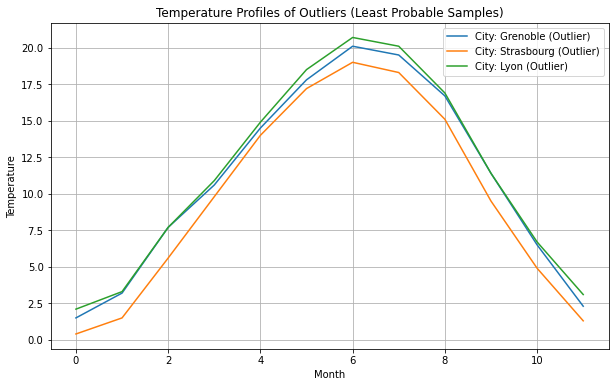

Outlier City: Grenoble, Log Probability: 6.8418027575388285
Outlier City: Strasbourg, Log Probability: 6.843052216446879
Outlier City: Lyon, Log Probability: 6.848363405260645


In [104]:
# Compute the log-probability of each city's temperature profile
log_probs = gmm.score_samples(temperature_matrix)

# Identify the outliers (samples with the smallest log-probability)
n_outliers = 3  # Specify how many outliers to identify
outliers_idx = np.argsort(log_probs)[:n_outliers]  # Get indices of the smallest log-probs

# Plot the temperature profiles of the outliers
plt.figure(figsize=(10, 6))
for idx in outliers_idx:
    plt.plot(temperature_matrix[idx], label=f'City: {villes[idx]} (Outlier)')

# Add titles, labels, and legend
plt.title('Temperature Profiles of Outliers (Least Probable Samples)')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Print the outlier cities and their log probabilities
for idx in outliers_idx:
    print(f'Outlier City: {villes[idx]}, Log Probability: {log_probs[idx]}')

## <span style="color:blue;">*Digits dataset* 🔢

#### Loading data

In [20]:
# Load digits data
digits = np.load("digits.npz")

#### Data exploration

In [21]:
digits.files

['xt', 'yt', 'y', 'x']

In [22]:
# Load xt, yt, y and x from the dataset
xt = digits['xt']
yt = digits['yt']
x2 = digits['x']
y2 = digits['y']


# Perform one simple pre-processing that scales the values between [0, 1]
x2 = x2 / 255

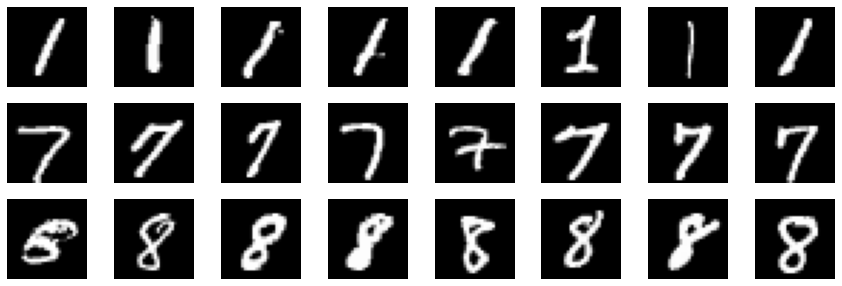

In [23]:
# Set up the figure
plt.figure(figsize=(15, 5))

# Define the number of samples 
samples_per_digit = 8 

# Get the indices for each digit (1, 7, and 8) from y2
indices_1 = np.where(y2 == 1)[0] # np.where returns a tuple with the first element being the indices
indices_7 = np.where(y2 == 7)[0]
indices_8 = np.where(y2 == 8)[0]

# Randomly choose samples from each digit
random_indices_1 = np.random.choice(indices_1, samples_per_digit, replace=False)
random_indices_7 = np.random.choice(indices_7, samples_per_digit, replace=False)
random_indices_8 = np.random.choice(indices_8, samples_per_digit, replace=False)

# Plot the samples, horizontally for each digit
for i in range(samples_per_digit):
    # Plot digit 1 in the first row
    plt.subplot(3, samples_per_digit, i + 1)
    plt.imshow(x2[random_indices_1[i]].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Plot digit 7 in the second row
    plt.subplot(3, samples_per_digit, samples_per_digit + i + 1)
    plt.imshow(x2[random_indices_7[i]].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Plot digit 8 in the third row
    plt.subplot(3, samples_per_digit, 2 * samples_per_digit + i + 1)
    plt.imshow(x2[random_indices_8[i]].reshape(28, 28), cmap='gray')
    plt.axis('off')

# Display the plot
plt.show()

#### K-means clustering

Since we are dealing with 3 labels, so we will set k=3 for the K-means clustering algorithm. But I wanted to show you the elbow method to see how it works.

#### Elbow method for determining the optimum number of clusters

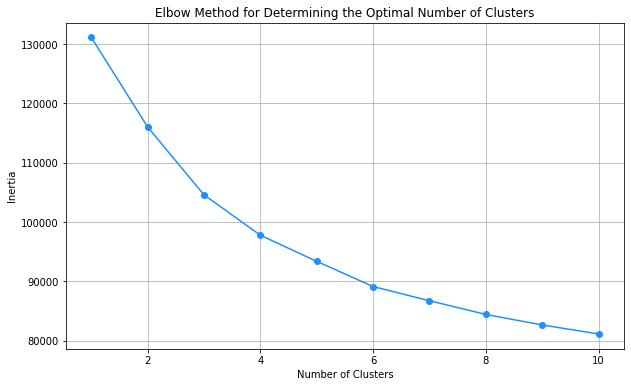

In [24]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x2)
    inertias.append(kmeans.inertia_)

# Plot the inertia curve as a function of the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o', color='dodgerblue')
plt.title("Elbow Method for Determining the Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

We can't see a clear elbow in the plot, but we can observe that the inertia value decreases more rapidly when the number of clusters increases from 2 to 3. This suggests that the optimal number of clusters may be 3, as it leads to a significant reduction in inertia compared to the case of 2 clusters.

##### *k_optimal = 3*

In [25]:
# Choose the number of clusters
k_optimal = 3

# Apply the KMeans algorithm
kmeans = KMeans(n_clusters=k_optimal, random_state=42) # random_state=42 for reproducibility
clusters = kmeans.fit_predict(x2)

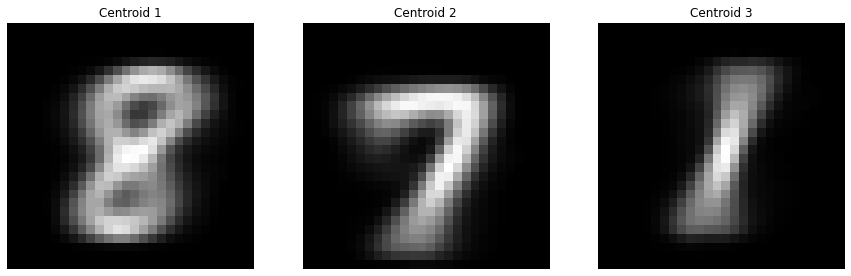

In [26]:
# Store the clusters centroids
centroids = kmeans.cluster_centers_

# Plot the centroids images corresponding to each cluster
plt.figure(figsize=(15, 5))
for i, centroid in enumerate(centroids):
    plt.subplot(1, k_optimal, i + 1)
    plt.imshow(centroid.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Centroid {i + 1}')

We can observe that the K-means algorithm successfully clusters the digits into 3 distinct groups and samples are clustered by class on digits. The algorithm is trained based on the pixel values of the images and showed a good performance in separating the digits into different clusters.

Clusters centroids doesn't represent any digit because they are the average of the pixel values of the images in each cluster. So, while plotting the centroids, we can recognize the shape of the digits, but they doesn't represent any true image.

##### *k_optimal = 2*

In [27]:
# Choose the number of clusters
k_optimal = 2

# Apply the KMeans algorithm
kmeans = KMeans(n_clusters=k_optimal, random_state=42) # random_state=42 for reproducibility
clusters = kmeans.fit_predict(x2)

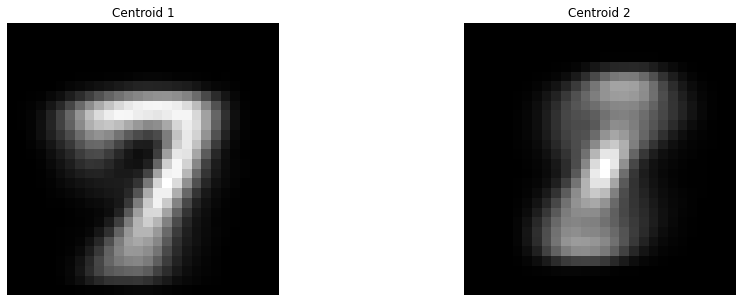

In [28]:
# Store the clusters centroids
centroids = kmeans.cluster_centers_

# Plot the centroids images corresponding to each cluster
plt.figure(figsize=(15, 5))
for i, centroid in enumerate(centroids):
    plt.subplot(1, k_optimal, i + 1)
    plt.imshow(centroid.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Centroid {i + 1}')

Here, the k-means algorithm is trained with k=2 and supposed that digits corresponding to 1 and 8 are in the same cluster.

##### *k_optimal = 4*

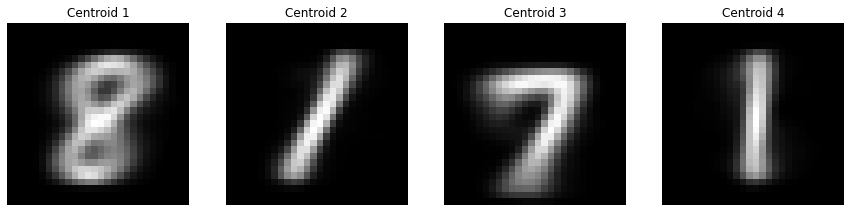

In [29]:
# Choose the number of clusters
k_optimal = 4

# Apply the KMeans algorithm
kmeans = KMeans(n_clusters=k_optimal, random_state=42) # random_state=42 for reproducibility
clusters = kmeans.fit_predict(x2)

# Store the clusters centroids
centroids = kmeans.cluster_centers_

# Plot the centroids images corresponding to each cluster
plt.figure(figsize=(15, 5))
for i, centroid in enumerate(centroids):
    plt.subplot(1, k_optimal, i + 1)
    plt.imshow(centroid.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Centroid {i + 1}')

Here, the k-means algorithm is trained with k=4 and supposed that there are 2 clusters for digits corresponding to 1. So, it's obvious that the best number of clusters is 3 where each cluster corresponds to a digit class.

---

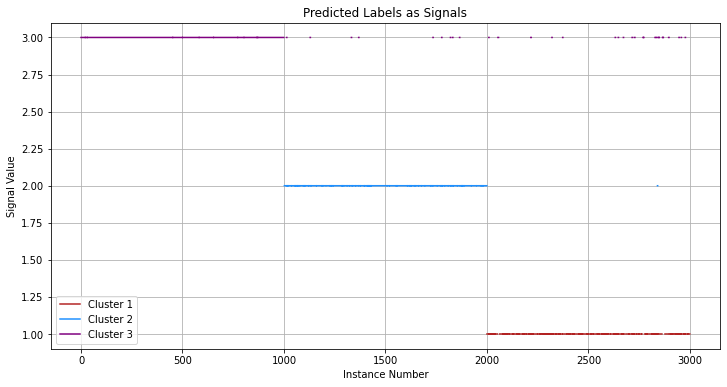

In [30]:
# Train K-means model (assuming 3 clusters for digits 1, 7, and 8)
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels = kmeans.fit_predict(x2)

# Create a signal array
signal_length = len(predicted_labels)
signal = np.zeros(signal_length)

# Assign values to the signal based on cluster membership
for i in range(signal_length):
    signal[i] = predicted_labels[i] + 1  # Add 1 to match cluster index to signal value

# Set colors for each cluster
colors = ['firebrick', 'dodgerblue', 'purple']  # One color for each cluster

# Plot the signal
plt.figure(figsize=(12, 6))
for j in range(3):  # Iterate through each cluster
    plt.plot(np.where(predicted_labels == j, signal, np.nan), color=colors[j], label=f'Cluster {j + 1}')

plt.title('Predicted Labels as Signals')
plt.xlabel('Instance Number')
plt.ylabel('Signal Value')
plt.legend()
plt.grid(True)
plt.show()

Since the samples are ordered by class in the dataset, a clustering respecting the true class is piecewise constant. So we can conclude that the k-means performs well on this dataset and is able to separate the digits into distinct clusters.

#### <span style="color:firebrick;">*Remark* 📝 : 
We can notice that digits corresponding to 1 are somtimes assigned to other clusters. This is due to the fact that the digit 1 can be written in different ways and the algorithm can't distinguish between them. So, the k-means algorithm is sensitive to the way the data is represented and the features used for clustering.

---

In [31]:
# Compute the quality of the clustering using the ground truth labels 

# Reshape the predicted labels
y2 = y2.reshape(-1)

# Compute the rand score
rand_index = rand_score(y2, predicted_labels)
print(f"Rand Score: {rand_index}")

# Compute the Adjusted Rand score
ari_rand_index = adjusted_rand_score(y2, predicted_labels)
print(f"Adjusted Rand Index: {ari_rand_index}")


Rand Score: 0.8808471712793153
Adjusted Rand Index: 0.7337556340018966


The **Rand Index** is a measure of the similarity between two data clusterings. It considers all pairs of samples and counts the number of pairs that are assigned to the same or different clusters in the predicted and true clusterings. The rand index ranges from 0 to 1, where 1 indicates perfect agreement between the predicted and true clusterings. It's calculated as follows: $$RI = \frac{(number\_ of\_ agreeing \_ pairs)}{(number \_ of \_ pairs)}.$$

In this case, the rand index is close to 1, indicating that the K-means algorithm performs well in clustering the digits dataset.

The **Adjusted Rand Index (ARI)** is a measure of the similarity between two data clusterings that considers all pairs of samples and counts the number of pairs that are assigned to the same or different clusters in the predicted and true clusterings. The ARI ranges from -1 to 1, where 1 indicates perfect agreement between the predicted and true clusterings, 0 indicates random clustering, and negative values indicate disagreement between the clusterings. It's calculated as follows: $$ARI = \frac{RI - Expected\_RI}{max(RI) - Expected\_RI}.$$

---

Next, we will adjust the value of K and repeat the previous two steps to identify the optimal values that yield the best results based on the Rand Index and Adjusted Rand Index.

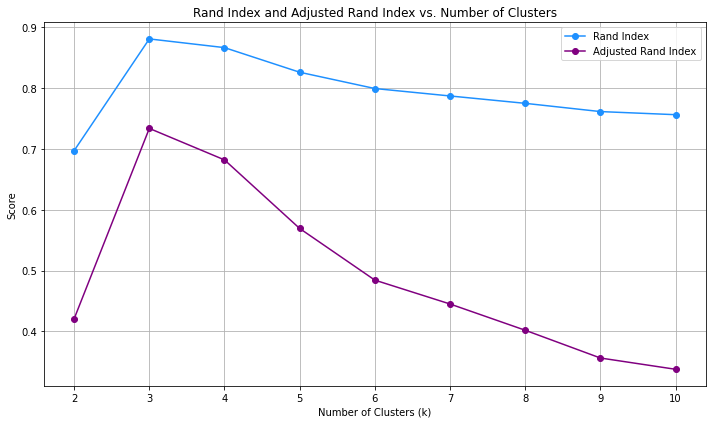

In [32]:
# Define a range of k values to test
k_values = range(2, 11)

# Initialize lists to store the Rand Index and Adjusted Rand Index for each k
rand_indices = []
adjusted_rand_indices = []

# Loop over the range of k values
for k in k_values:
    # Apply the KMeans algorithm
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(x2)
    
    # Compute the Rand Index
    rand_index = rand_score(y2, clusters)
    rand_indices.append(rand_index)
    
    # Compute the Adjusted Rand Index
    adjusted_rand_index = adjusted_rand_score(y2, clusters)
    adjusted_rand_indices.append(adjusted_rand_index)

# Plot both the Rand Index and Adjusted Rand Index for each k in the same figure
plt.figure(figsize=(10, 6))

plt.plot(k_values, rand_indices, marker='o', color='dodgerblue', label="Rand Index")
plt.plot(k_values, adjusted_rand_indices, marker='o', color='purple', label="Adjusted Rand Index")

plt.title("Rand Index and Adjusted Rand Index vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


#### Interpretation 📊 :
- **Rand Index (Blue Curve)**: 
  - The Rand Index increases rapidly at K=3, indicating a good match when the number of clusters aligns with the three classes of digits (1, 7, and 8). After K=3, the performance plateaus or declines slightly, suggesting that adding more clusters doesn't improve clustering quality.
  
- **Adjusted Rand Index (Purple Curve)**: 
  - The Adjusted Rand Index also peaks at K=3, suggesting this is the optimal number of clusters for separating the digits. Beyond K=3, it decreases, indicating that increasing the number of clusters leads to incorrect splits that don't correspond well to the actual data structure.

---

### Density Estimation